In [4]:
# Eri Osta
# ads829

## Lab 1C

<em>Lab 1 consist of three exercises. This is the third of three exercises in Lab 1, which focuses on basic loops and conditionals, functions and passing objects as parameters, dictionaries, and bar chart visualization. </em>

This exercise is to simulate 200000 rounds of a dice version of the children's card game War. The purpose of this simulation is to determine which player has an advantage of based on these rules below. 

**Rules**

There are two players: PLAYER and BANKER. These are just names for the players. Each player has a regular six-sided die. In one round, each player will roll their die and attempt to get the highest value. The rules are:

- If either player rolls a six, the game stops. The player with the higher die value wins. If both dice values are the same, then it is a tie. 
- If neither player has a six in the initial roll, then a player may re-roll under these conditions:
    - If the BANKER initially rolled a 3 or below, the BANKER will re-roll their die. 
    - If the PLAYER initially rolled a 2 or below, the PLAYER will re-roll their die.
    - After this reroll, the game stops. The player with the higher die value wins. If both dice values are the same, then it is a tie. 

**Tasks**

1. The starter code has been created for you. You must use it with the two functions you will write, especially the ```outcomes``` dictionary variable declared for you. 
2. Complete the ```simulateGames``` function. Simulate the total number of rounds with the rules. Determine the outcome and increase the count on the ```outcomes``` dictionary. Use the ```rollDie``` function included for you for this task.
3. Complete the ```visualizeResults``` function. Use the ```seaborn``` ```barplot()``` to visualize the outcomes. 
4. Function comments have been added for you.
5. Answer the questions below. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import sys, os

# Get key
def get_key(val, dict):
    for key, value in dict.items():
        if val == value:
            return key

# Disable print
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore print
def enablePrint():
    sys.stdout = sys.__stdout__


def rollDie( m ):
    """
    This function creates a random number between 1 and m inclusive and returns it.

    Parameters
    ----------
    m : int
        Upper bound of random number

    Returns
    -------
    int
        A random number between 1 and m inclusive
    """
    die = random.randrange( 1, m + 1 ) 
    return die

def simulateGames(n,verbose=False):

    """
    This function simulateGame simulates several rounds of the game. See the rules above for how each game
    round is played.
    
    Parameters
    ----------
    n : int
        The number of games

    verbose : bool
        Show all print statements throughout the game except the final print statement with the score board after n games. Default is False.
        
    Returns
    -------
    wins : dictionary
        A dictionary with keys 'player', 'banker', 'tie'. All the values should be zero.
    """

    if verbose==True:
        enablePrint()
    else:
        blockPrint()

    wins = {'PLAYER':0, "BANKER":0, "TIE":0}

    for round in np.arange(1,n+1):

        rolls = {'PLAYER':rollDie(6), "BANKER":rollDie(6)}

        print(f"Round {round}")

        print(f"PLAYER rolled a %s and BANKER rolled a %s" % (rolls["PLAYER"],rolls["BANKER"]))

        # If roll 6
        if rolls["PLAYER"] == 6 or rolls["BANKER"] == 6:
            print(" ")
            print(f"Game stoped because {get_key(6,rolls)} rolled a 6")
            if wins["BANKER"] > wins["PLAYER"]:
                print("BANKER wins with", wins["BANKER"])
            elif wins["PLAYER"] > wins["BANKER"]:
                print("PLAYER wins with", wins["PLAYER"])
            else:
                print("No winner. It's a tie!")
            print("###################")
            pass
        # If tie
        elif rolls["PLAYER"] == rolls["BANKER"]:
            print("There is a tie!")
            wins["TIE"] = wins["TIE"] + 1

        elif rolls["BANKER"] <= 3:
            rolls["BANKER"] = rollDie(6)
        
        elif rolls["PLAYER"] <= 2:
            rolls["PLAYER"] = rollDie(6)

        if rolls["BANKER"] > rolls["PLAYER"]:
            wins.update({"BANKER": wins["BANKER"] + 1})

        elif rolls["PLAYER"] > rolls["BANKER"]:
            wins.update({"PLAYER":wins["PLAYER"]+1})

        print("###################")
        print("PLAYER:",wins["PLAYER"])
        print("BANKER:",wins["BANKER"])
        print("###################")
        print("")
        print("")

    enablePrint()
    if wins["BANKER"] > wins["PLAYER"]:
        print("BANKER wins with", wins["BANKER"])
    elif wins["PLAYER"] > wins["BANKER"]:
        print("PLAYER wins with", wins["PLAYER"])
    else:
        print("No winner. It's a tie!")
    
    return wins

# Visualize games
def visualizeResults(n):
    """
    This function creates a bar plot of frequencies for each outcome using the seaborn package. 
    It will show the frequency of outcomes for the PLAYER, BANKER, and TIE out of 100%. Recall
    that wins dictionary parameter has a total count of outcomes and that you will need
    to find the percentage of occurrences. 
    
    Parameters
    ----------
    n : int
        The number of games
        
    Returns
    -------
    None
    """
    wins = simulateGames(n)
    players = list(wins.keys())
    scores = [wins[k] for k in players]
    sns.barplot(x=players, y=scores)
    plt.show()
  

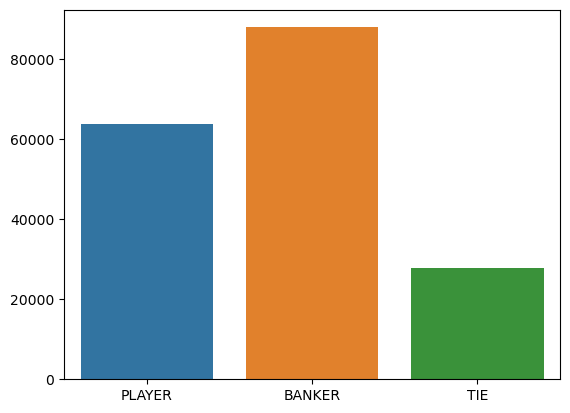

In [6]:
# Sample driver code
games = 200000 # Simulate 200000 games
visualizeResults(n=games)

### Questions

Answer the following questions about your program:

1. Under these rules, which outcome has the best chances of occurring? Why do you think that is? You do not have to conduct any type of probability analysis, just give your best explanation.

2. What happens if you change the condition in which the PLAYER gets to re-roll? Right now, the PLAYER re-rolls if they got a 2 or below. Are their chances better or worse at winning if the threshold was lowered or raised? (You can modify your program to answer this question, but be sure to restore it back to the original requirements before submission). 

### Answers

1. 